In [1]:
import requests
from bs4 import BeautifulSoup 
import pandas as pd
import re
import numpy as np
import time

In [2]:
df= pd.read_csv("players_all.xls")
df

,name,Age,Overall rating,Potential,Team & Contract,ID,Height,Weight,foot,Best overall,...,GK Positioning,GK Reflexes,Total stats,Base stats,International reputation,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / Pace
0,J. Todibo CB,22,79,84,Nice\n2021 ~ 2027,245388,"190cm / 6'3""",88kg / 194lbs,Right,81,...,8,13,1852,409,1,75,47,63,67,80
1,B. Verbruggen GK,19,73,83,Anderlecht\n2020 ~ 2025,258498,"194cm / 6'4""",89kg / 196lbs,Right,73,...,68,76,1127,412,1,75,70,71,76,52
2,M. Ugarte CDM CM,21,79,85,Sporting CP\n2021 ~ 2026,253306,"182cm / 6'0""",77kg / 170lbs,Right,80,...,8,13,1950,433,1,72,63,71,77,75
3,Z. Debast CB,18,70,84,Anderlecht\n2019 ~ 2025,254262,"189cm / 6'2""",76kg / 168lbs,Right,72,...,6,5,1805,395,1,67,53,67,67,69
4,07 D. Last GK,37,61,60,Örgryte\n2009,21555,"182cm / 6'0""",82kg / 181lbs,Right,61,...,70,60,939,356,3,63,55,63,60,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3115,G. Togni LM LWB LW,24,70,71,"Defensa y Justicia\nDec 31, 2023 On loan",237512,"180cm / 5'11""",76kg / 168lbs,Left,70,...,13,9,1907,411,1,77,66,65,71,63
3116,M. Camara CM CDM,25,75,77,Roma\n2018 ~ 2024,237520,"182cm / 6'0""",80kg / 176lbs,Right,78,...,11,7,2098,452,1,76,74,73,74,74
3117,Jorge Cuenca CB,22,73,79,Villarreal\n2020 ~ 2025,237522,"190cm / 6'3""",75kg / 165lbs,Left,75,...,14,12,1642,347,1,60,37,58,52,74
3118,S. Kaba ST,27,69,69,"Cardiff City\nJun 30, 2023 On loan",237524,"191cm / 6'3""",80kg / 176lbs,Right,69,...,8,14,1704,367,1,63,67,59,67,31


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3120 entries, 0 to 3119
Data columns (total 64 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   name                      3120 non-null   object
 1   Age                       3120 non-null   int64 
 2   Overall rating            3120 non-null   int64 
 3   Potential                 3120 non-null   int64 
 4   Team & Contract           3120 non-null   object
 5   ID                        3120 non-null   int64 
 6   Height                    3120 non-null   object
 7   Weight                    3120 non-null   object
 8   foot                      3120 non-null   object
 9   Best overall              3120 non-null   int64 
 10  Best position             3120 non-null   object
 11  Growth                    3120 non-null   int64 
 12  Value                     3120 non-null   object
 13  Wage                      3120 non-null   object
 14  Release clause          

In [4]:
df.columns

Index(['name', 'Age', 'Overall rating', 'Potential', 'Team & Contract', 'ID',
       'Height', 'Weight', 'foot', 'Best overall', 'Best position', 'Growth',
       'Value', 'Wage', 'Release clause', 'Total attacking', 'Crossing',
       'Finishing', 'Heading accuracy', 'Short passing', 'Volleys',
       'Total skill', 'Dribbling', 'Curve', 'FK Accuracy', 'Long passing',
       'Ball control', 'Total movement', 'Acceleration', 'Sprint speed',
       'Agility', 'Reactions', 'Balance', 'Total power', 'Shot power',
       'Jumping', 'Stamina', 'Strength', 'Long shots', 'Total mentality',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Total defending', 'Marking', 'Standing tackle',
       'Sliding tackle', 'Total goalkeeping', 'GK Diving', 'GK Handling',
       'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total stats',
       'Base stats', 'International reputation', 'Pace / Diving',
       'Shooting / Handling', 'Passing / Kicking', 'Drib

In [5]:
df.columns = df.columns.str.strip()

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2702 entries, 0 to 3119
Data columns (total 64 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   name                      2702 non-null   object
 1   Age                       2702 non-null   int64 
 2   Overall rating            2702 non-null   int64 
 3   Potential                 2702 non-null   int64 
 4   Team & Contract           2702 non-null   object
 5   ID                        2702 non-null   int64 
 6   Height                    2702 non-null   object
 7   Weight                    2702 non-null   object
 8   foot                      2702 non-null   object
 9   Best overall              2702 non-null   int64 
 10  Best position             2702 non-null   object
 11  Growth                    2702 non-null   int64 
 12  Value                     2702 non-null   object
 13  Wage                      2702 non-null   object
 14  Release clause          

In [8]:
df.head()

,name,Age,Overall rating,Potential,Team & Contract,ID,Height,Weight,foot,Best overall,...,GK Positioning,GK Reflexes,Total stats,Base stats,International reputation,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / Pace
0,J. Todibo CB,22,79,84,Nice\n2021 ~ 2027,245388,"190cm / 6'3""",88kg / 194lbs,Right,81,...,8,13,1852,409,1,75,47,63,67,80
1,B. Verbruggen GK,19,73,83,Anderlecht\n2020 ~ 2025,258498,"194cm / 6'4""",89kg / 196lbs,Right,73,...,68,76,1127,412,1,75,70,71,76,52
2,M. Ugarte CDM CM,21,79,85,Sporting CP\n2021 ~ 2026,253306,"182cm / 6'0""",77kg / 170lbs,Right,80,...,8,13,1950,433,1,72,63,71,77,75
3,Z. Debast CB,18,70,84,Anderlecht\n2019 ~ 2025,254262,"189cm / 6'2""",76kg / 168lbs,Right,72,...,6,5,1805,395,1,67,53,67,67,69
4,07 D. Last GK,37,61,60,Örgryte\n2009,21555,"182cm / 6'0""",82kg / 181lbs,Right,61,...,70,60,939,356,3,63,55,63,60,45


In [9]:
type(df['International reputation'])

pandas.core.series.Series

In [10]:
df["Height"]=df['Height'].str.extract(r'(\d+)cm')

In [11]:
df["Height"]

0       190
1       194
2       182
3       189
4       182
       ... 
3114    178
3115    180
3116    182
3118    191
3119    189
Name: Height, Length: 2702, dtype: object

In [12]:
df.head()

,name,Age,Overall rating,Potential,Team & Contract,ID,Height,Weight,foot,Best overall,...,GK Positioning,GK Reflexes,Total stats,Base stats,International reputation,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / Pace
0,J. Todibo CB,22,79,84,Nice\n2021 ~ 2027,245388,190,88kg / 194lbs,Right,81,...,8,13,1852,409,1,75,47,63,67,80
1,B. Verbruggen GK,19,73,83,Anderlecht\n2020 ~ 2025,258498,194,89kg / 196lbs,Right,73,...,68,76,1127,412,1,75,70,71,76,52
2,M. Ugarte CDM CM,21,79,85,Sporting CP\n2021 ~ 2026,253306,182,77kg / 170lbs,Right,80,...,8,13,1950,433,1,72,63,71,77,75
3,Z. Debast CB,18,70,84,Anderlecht\n2019 ~ 2025,254262,189,76kg / 168lbs,Right,72,...,6,5,1805,395,1,67,53,67,67,69
4,07 D. Last GK,37,61,60,Örgryte\n2009,21555,182,82kg / 181lbs,Right,61,...,70,60,939,356,3,63,55,63,60,45


In [13]:
df["Weight"]=df['Weight'].str.extract(r'(\d+)kg')

In [14]:
df.head()

,name,Age,Overall rating,Potential,Team & Contract,ID,Height,Weight,foot,Best overall,...,GK Positioning,GK Reflexes,Total stats,Base stats,International reputation,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / Pace
0,J. Todibo CB,22,79,84,Nice\n2021 ~ 2027,245388,190,88,Right,81,...,8,13,1852,409,1,75,47,63,67,80
1,B. Verbruggen GK,19,73,83,Anderlecht\n2020 ~ 2025,258498,194,89,Right,73,...,68,76,1127,412,1,75,70,71,76,52
2,M. Ugarte CDM CM,21,79,85,Sporting CP\n2021 ~ 2026,253306,182,77,Right,80,...,8,13,1950,433,1,72,63,71,77,75
3,Z. Debast CB,18,70,84,Anderlecht\n2019 ~ 2025,254262,189,76,Right,72,...,6,5,1805,395,1,67,53,67,67,69
4,07 D. Last GK,37,61,60,Örgryte\n2009,21555,182,82,Right,61,...,70,60,939,356,3,63,55,63,60,45


In [15]:
df['Height'] = df['Height'].astype(int)
df['Weight'] = df['Weight'].astype(int)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2702 entries, 0 to 3119
Data columns (total 64 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   name                      2702 non-null   object
 1   Age                       2702 non-null   int64 
 2   Overall rating            2702 non-null   int64 
 3   Potential                 2702 non-null   int64 
 4   Team & Contract           2702 non-null   object
 5   ID                        2702 non-null   int64 
 6   Height                    2702 non-null   int32 
 7   Weight                    2702 non-null   int32 
 8   foot                      2702 non-null   object
 9   Best overall              2702 non-null   int64 
 10  Best position             2702 non-null   object
 11  Growth                    2702 non-null   int64 
 12  Value                     2702 non-null   object
 13  Wage                      2702 non-null   object
 14  Release clause          

In [17]:
substrings=["GK","RB","RCB","CB","LCB","LB","RWB","RDM","CDM","LDM","LWB","RM","RCM","CM","LCM","LM","LAM","CAM","RAM","RW","RF","CF","LF","LW","LS","ST","RS"]
pattern = '|'.join(substrings)
df['name'] = df['name'].str.replace(pattern, '')

C:\Users\honey\AppData\Local\Temp\ipykernel_13144\4021688859.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['name'] = df['name'].str.replace(pattern, '')


In [18]:
# By using '|'.join(substrings) to create the regular expression pattern, 
# you can avoid writing multiple str.replace() statements for each substring and handle the removal of multiple substrings in a more concise manner.

In [19]:
df.head(10)

,name,Age,Overall rating,Potential,Team & Contract,ID,Height,Weight,foot,Best overall,...,GK Positioning,GK Reflexes,Total stats,Base stats,International reputation,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / Pace
0,J. Todibo,22,79,84,Nice\n2021 ~ 2027,245388,190,88,Right,81,...,8,13,1852,409,1,75,47,63,67,80
1,B. Verbruggen,19,73,83,Anderlecht\n2020 ~ 2025,258498,194,89,Right,73,...,68,76,1127,412,1,75,70,71,76,52
2,M. Ugarte,21,79,85,Sporting CP\n2021 ~ 2026,253306,182,77,Right,80,...,8,13,1950,433,1,72,63,71,77,75
3,Z. Debast,18,70,84,Anderlecht\n2019 ~ 2025,254262,189,76,Right,72,...,6,5,1805,395,1,67,53,67,67,69
4,07 D. Last,37,61,60,Örgryte\n2009,21555,182,82,Right,61,...,70,60,939,356,3,63,55,63,60,45
5,E. Camavinga,19,81,89,Real Madrid\n2021 ~ 2027,248243,182,68,Left,83,...,12,12,2139,460,3,79,66,79,82,76
6,M. Al-Tamari,25,70,73,OH Leuven\n2020 ~ 2023,259191,176,66,Left,71,...,7,7,1792,377,1,83,61,62,77,37
7,A. Jashari,19,69,83,Luzern\n2020 ~ 2025,257186,181,82,Left,70,...,13,5,1870,394,1,66,61,65,67,64
8,G. Isaksen,21,73,82,Midtjylland\n2019 ~ 2025,248729,178,65,Left,75,...,7,6,1766,387,1,89,67,64,76,40
9,T. Baldanzi,19,75,89,Empoli\n2021 ~ 2027,269312,170,63,Left,77,...,12,7,1842,386,1,75,72,70,79,40


In [20]:
df[['team', 'contract']] = df['Team & Contract'].str.split('\n', 1, expand=True)

In [21]:
df.head()

,name,Age,Overall rating,Potential,Team & Contract,ID,Height,Weight,foot,Best overall,...,Total stats,Base stats,International reputation,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / Pace,team,contract
0,J. Todibo,22,79,84,Nice\n2021 ~ 2027,245388,190,88,Right,81,...,1852,409,1,75,47,63,67,80,Nice,2021 ~ 2027
1,B. Verbruggen,19,73,83,Anderlecht\n2020 ~ 2025,258498,194,89,Right,73,...,1127,412,1,75,70,71,76,52,Anderlecht,2020 ~ 2025
2,M. Ugarte,21,79,85,Sporting CP\n2021 ~ 2026,253306,182,77,Right,80,...,1950,433,1,72,63,71,77,75,Sporting CP,2021 ~ 2026
3,Z. Debast,18,70,84,Anderlecht\n2019 ~ 2025,254262,189,76,Right,72,...,1805,395,1,67,53,67,67,69,Anderlecht,2019 ~ 2025
4,07 D. Last,37,61,60,Örgryte\n2009,21555,182,82,Right,61,...,939,356,3,63,55,63,60,45,Örgryte,2009


In [22]:
df = df.drop(['Team & Contract'], axis=1)

In [23]:
df.head()

,name,Age,Overall rating,Potential,ID,Height,Weight,foot,Best overall,Best position,...,Total stats,Base stats,International reputation,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / Pace,team,contract
0,J. Todibo,22,79,84,245388,190,88,Right,81,CB,...,1852,409,1,75,47,63,67,80,Nice,2021 ~ 2027
1,B. Verbruggen,19,73,83,258498,194,89,Right,73,GK,...,1127,412,1,75,70,71,76,52,Anderlecht,2020 ~ 2025
2,M. Ugarte,21,79,85,253306,182,77,Right,80,CDM,...,1950,433,1,72,63,71,77,75,Sporting CP,2021 ~ 2026
3,Z. Debast,18,70,84,254262,189,76,Right,72,CDM,...,1805,395,1,67,53,67,67,69,Anderlecht,2019 ~ 2025
4,07 D. Last,37,61,60,21555,182,82,Right,61,GK,...,939,356,3,63,55,63,60,45,Örgryte,2009


In [24]:
df["Value"]

0       €24.5M
1        €5.5M
2         €26M
3        €3.5M
4           €0
         ...  
3114    €11.5M
3115       €2M
3116       €7M
3118     €1.5M
3119     €625K
Name: Value, Length: 2702, dtype: object

In [25]:
df['Value'] = df['Value'].str.replace('€', '').replace({'M': 'e6', 'K': 'e3'}, regex=True).astype(float).astype(int)

In [26]:
df["Value"]

0       24500000
1        5500000
2       26000000
3        3500000
4              0
          ...   
3114    11500000
3115     2000000
3116     7000000
3118     1500000
3119      625000
Name: Value, Length: 2702, dtype: int32

In [27]:
df['Wage']

0       €37K
1        €6K
2       €11K
3        €3K
4         €0
        ... 
3114    €10K
3115     €7K
3116    €47K
3118    €14K
3119     €2K
Name: Wage, Length: 2702, dtype: object

 Wage 
 Release clause 

In [28]:
df['Wage'] = df['Wage'].str.replace('€', '').replace({'M': 'e6', 'K': 'e3'}, regex=True).astype(float).astype(int)

In [29]:
df['Wage']

0       37000
1        6000
2       11000
3        3000
4           0
        ...  
3114    10000
3115     7000
3116    47000
3118    14000
3119     2000
Name: Wage, Length: 2702, dtype: int32

In [30]:
df['Release clause']

0       €48.4M
1        €9.4M
2       €57.2M
3        €7.4M
4           €0
         ...  
3114    €18.1M
3115        €0
3116    €12.4M
3118        €0
3119     €1.2M
Name: Release clause, Length: 2702, dtype: object

In [31]:
df['Release clause'] = df['Release clause'].str.replace('€', '').replace({'M': 'e6', 'K': 'e3'}, regex=True).astype(float).astype(int)

In [32]:
df['Release clause']

0       48400000
1        9400000
2       57200000
3        7400000
4              0
          ...   
3114    18100000
3115           0
3116    12400000
3118           0
3119     1200000
Name: Release clause, Length: 2702, dtype: int32

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2702 entries, 0 to 3119
Data columns (total 65 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   name                      2702 non-null   object
 1   Age                       2702 non-null   int64 
 2   Overall rating            2702 non-null   int64 
 3   Potential                 2702 non-null   int64 
 4   ID                        2702 non-null   int64 
 5   Height                    2702 non-null   int32 
 6   Weight                    2702 non-null   int32 
 7   foot                      2702 non-null   object
 8   Best overall              2702 non-null   int64 
 9   Best position             2702 non-null   object
 10  Growth                    2702 non-null   int64 
 11  Value                     2702 non-null   int32 
 12  Wage                      2702 non-null   int32 
 13  Release clause            2702 non-null   int32 
 14  Total attacking         

In [34]:
df.head()

,name,Age,Overall rating,Potential,ID,Height,Weight,foot,Best overall,Best position,...,Total stats,Base stats,International reputation,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / Pace,team,contract
0,J. Todibo,22,79,84,245388,190,88,Right,81,CB,...,1852,409,1,75,47,63,67,80,Nice,2021 ~ 2027
1,B. Verbruggen,19,73,83,258498,194,89,Right,73,GK,...,1127,412,1,75,70,71,76,52,Anderlecht,2020 ~ 2025
2,M. Ugarte,21,79,85,253306,182,77,Right,80,CDM,...,1950,433,1,72,63,71,77,75,Sporting CP,2021 ~ 2026
3,Z. Debast,18,70,84,254262,189,76,Right,72,CDM,...,1805,395,1,67,53,67,67,69,Anderlecht,2019 ~ 2025
4,07 D. Last,37,61,60,21555,182,82,Right,61,GK,...,939,356,3,63,55,63,60,45,Örgryte,2009


In [35]:
df.describe()

,Age,Overall rating,Potential,ID,Height,Weight,Best overall,Growth,Value,Wage,...,GK Positioning,GK Reflexes,Total stats,Base stats,International reputation,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / Pace
count,2702.000000,2702.000000,2702.000000,2702.000000,2702.000000,2702.000000,2702.000000,2702.000000,2.702000e+03,2702.000000,...,2702.000000,2702.000000,2702.000000,2702.000000,2702.000000,2702.000000,2702.000000,2702.000000,2702.000000,2702.000000
mean,23.515914,71.976684,78.401925,237167.354552,181.498890,74.891562,73.208734,6.425241,1.039336e+07,27217.561066,...,14.232420,14.465581,1765.961880,389.003701,1.335677,73.003701,59.917839,64.500000,70.211695,53.787195
std,4.416439,7.000437,5.549598,30408.694874,6.905119,7.265658,6.821365,5.549561,1.612582e+07,38354.393778,...,15.743596,16.374078,254.447228,39.500603,0.713373,10.067892,14.266410,9.768393,9.018696,17.897531
min,16.000000,48.000000,56.000000,41.000000,156.000000,52.000000,49.000000,-7.000000,0.000000e+00,0.000000,...,2.000000,2.000000,815.000000,263.000000,1.000000,30.000000,21.000000,30.000000,33.000000,15.000000
25%,20.000000,67.000000,75.000000,227704.750000,176.000000,70.000000,68.000000,1.000000,1.700000e+06,4000.000000,...,8.000000,8.000000,1637.000000,362.000000,1.000000,67.000000,51.000000,58.000000,65.000000,38.000000
50%,23.000000,72.000000,79.000000,242172.000000,182.000000,75.000000,73.500000,6.000000,3.800000e+06,13000.000000,...,10.000000,11.000000,1796.500000,390.500000,1.000000,74.000000,63.000000,65.000000,71.000000,57.000000
75%,26.000000,77.000000,82.000000,256786.250000,187.000000,80.000000,78.000000,10.000000,1.250000e+07,36000.000000,...,13.000000,13.000000,1938.000000,417.000000,1.000000,80.000000,71.000000,71.000000,76.000000,69.000000
max,44.000000,91.000000,95.000000,275248.000000,204.000000,102.000000,92.000000,26.000000,1.905000e+08,450000.000000,...,90.000000,90.000000,2324.000000,495.000000,5.000000,97.000000,92.000000,93.000000,94.000000,89.000000


In [36]:
df.to_csv("newdf.csv", index=False)

In [37]:
kolonlar = ['Value', 'Wage', 'Release clause']
df_gosterilen_kolonlar = df[kolonlar]
print(df_gosterilen_kolonlar)

         Value   Wage  Release clause
0     24500000  37000        48400000
1      5500000   6000         9400000
2     26000000  11000        57200000
3      3500000   3000         7400000
4            0      0               0
...        ...    ...             ...
3114  11500000  10000        18100000
3115   2000000   7000               0
3116   7000000  47000        12400000
3118   1500000  14000               0
3119    625000   2000         1200000

[2702 rows x 3 columns]


In [38]:
import matplotlib.pyplot as plt

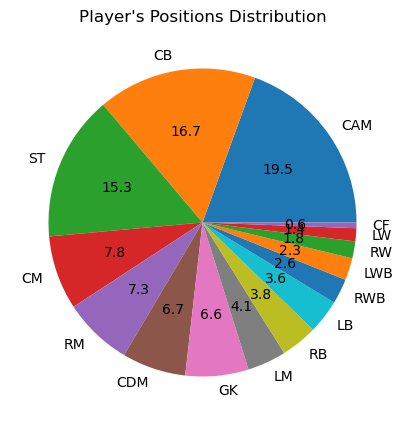

In [39]:
plt.figure(figsize=(5,5))
loc=df["Best position"].value_counts()
loc.plot(kind='pie' ,autopct='%.1f',fontsize=10,subplots=True)
plt.title("Player's Positions Distribution")
plt.ylabel("")
plt.show()